# Search pagination

Next let's retrieve all the results from this query and keep track of all the dates for each result. Since there are many results, we must use pagination to retrieve all the data.

We start again with importing required Python libraries:

In [1]:
import matplotlib.pyplot as plt # for displaying data
import requests                 # for making http requests
import time                     # for pausing between requests

## Paginate and visualize results

Here we will loop through the pages of search results and keep track of dates

In [2]:
# We start with the same url from the previous book
url = 'https://www.loc.gov/collections/artists-posters/?q=color&dates=1800/1925&fa=location:united+states&fo=json'

# In order to perform less requests, we can increase the number of results per page (from the default 25)
results_per_page = 150

# Loop through all the pages until there is no more pages
has_more = True
next_url = f'{url}&c={results_per_page}'
dates = []
page = 1
while next_url is not None:

    # Make the JSON request
    response = requests.get(next_url)

    # Read the response as JSON
    data = response.json()

    # Read pagination and results
    pagination = data['pagination']
    results = data['results']
    print(f'Retrieved {len(results)} results from page {page}.')

    # Keep track of all the dates
    dates += [r['date'] for r in results if 'date' in r]

    # Check to see if there are more pages
    if 'next' in pagination and pagination['next'] and isinstance(pagination['next'], str) and len(pagination['next']) > 0:
        next_url = pagination['next']
        page += 1
        # Wait one second between each request to avoid rate-limiting
        time.sleep(1)
    else:
        next_url = None
    

Retrieved 150 from page 1.
Retrieved 150 from page 2.
Retrieved 101 from page 3.


Finally, we will display all the dates in a simple chart using matplotlib.

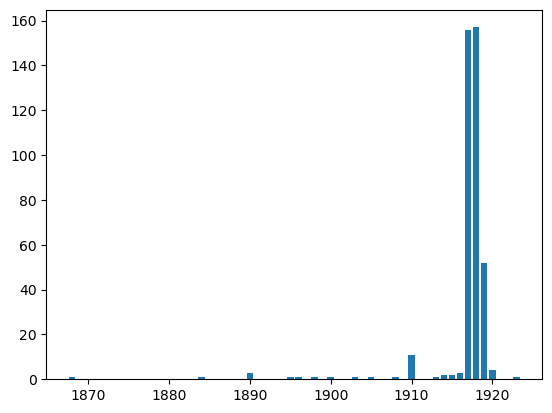

In [3]:
# Parse all the years from the dates
yearMap = {}
for date in dates:
    date_string = str(date)

    # Less than 4 chars, so not enough for a year
    if len(date_string) < 4:
        continue
    
    # Assume the first 4 chars is the year
    year_string = date_string[:4]

    # keep track of counts
    if year_string in yearMap:
        yearMap[year_string] += 1
    else:
        yearMap[year_string] = 1

# Convert to list
yearData = sorted([(int(year), yearMap[year]) for year in yearMap])

# X-axis values 
x = [d[0] for d in yearData]
 
# Y-axis values 
y = [d[1] for d in yearData]
 
# Plot and show
plt.bar(x, y) 
plt.show()